## Model parameter selection using Cross Validation 30/June/2020

* **Cross Validation** is a method which uses the entire dataset for training and testing the model.
    * Usally 80% of the entire dataset is used as the training dataset whereas the remaining 20% is used for testing.
    * K-fold Cross Validation technique divides the dataset into K equal subsets of data. 
    * The first subset is used as the test dataset and the remaining (k-1) subsets are used as training dataset.
    * The model is trained on this first (k-1) training dataset and is tested against the first test dataset.
    * The above process is repeated k times and each time the test dataset is changed.
    * The biggest advantage is that each datapoint gets equl opportunity to be in the test dataset.
    
* Notebook reference:
    * https://towardsdatascience.com/cross-validation-430d9a5fee22
    * https://www.youtube.com/watch?v=fSytzGwwBVw
    * https://www.kaggle.com/alexisbcook/cross-validation
* Dataset reference:
    * https://www.kaggle.com/c/home-data-for-ml-course/data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [13]:
train_data = pd.read_csv('./Train.csv',index_col='Id')
test_data = pd.read_csv('./Test.csv',index_col='Id')

In [14]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
len(train_data),len(test_data)

(1460, 1459)

In [16]:
# Splitting the attributes and labels
y = train_data['SalePrice']
train_data.drop(columns='SalePrice',inplace=True)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
# For this simple cross validation exercise, we will consider only the numerical columns

num_cols = [cols for cols in train_data.columns if train_data[cols].dtype in ['float64','int64']]
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [21]:
# preparing the training and test data set out of the numerical columns

x = train_data[num_cols].copy()
x_test = test_data[num_cols].copy()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [22]:
# building a pipeline to preprocess the data and to create a model

my_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('model',RandomForestRegressor(n_estimators=50,random_state=0))
])


In [24]:
# identifying the CV score for the model
score = -1* cross_val_score(my_pipeline,x,y,cv=5,scoring='neg_mean_absolute_error')
print('Average MAE is: ',score.mean())

Average MAE is:  18276.410356164386


## The mean MAE for the model for estimator value -50 was 18276.4
* With help of a function we can now check the mean MAE for the model with different estimator values
* The function will contain a pipeline for data preprocessing and model creation
* The function will return the average MAE
* We will implement a 5-fold Cross validation for different set of estimator values ranging from (100 to 400) with step size of 50

In [25]:
def get_score(num_estimator):
    """Return the mean MAE over 5 folds Random forest model
    key argument: num_estimator - the number of trees in a random forest model
    """
    pipeline_def = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='mean')),
        ('model',RandomForestRegressor(n_estimators=num_estimator,random_state=0))
    ])
    score = -1*cross_val_score(pipeline_def,x,y,cv=5, scoring ='neg_mean_absolute_error')
    return (score.mean())

In [42]:
# storing the scores in a dictionary
mae_scores = {x*50:get_score(x*50) for x in range(1,9)}

In [43]:
# picking the keys and values from the mae score dictionary
x_val = list(mae_scores.keys())
y_val = list(mae_scores.values())

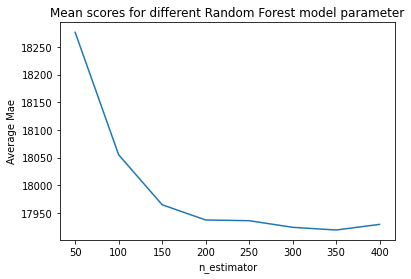

In [46]:
import matplotlib.pyplot as plt
plt.plot(x_val,y_val)
plt.title(label='Mean scores for different Random Forest model parameter')
plt.xlabel('n_estimator')
plt.ylabel('Average Mae')
plt.xticks()
plt.xticks()
plt.show()

In [50]:
print('Best estimator value for a 5-fold CV on a random forest model is ',min(mae_scores,key=mae_scores.get))

Best estimator value for a 5-fold CV on a random forest model is  350
